## Bodega Medellín - Waste

In [50]:
import truckRoutingService as trs
import matplotlib.pyplot as plt
import pandas as pd
import json
import copy

In [51]:
packages = pd.read_excel('3-09.xlsx', index_col = 'id').to_dict(orient = 'index')
for i in packages:
    packages[i]['coordinates'] = [packages[i]['lat'], packages[i]['lng']]
    
data = {
	"fleet": {},
	"warehouse": {
		"name": "Bodega Medellin",
		"coordinates": [6.1894463,-75.6020258],
		"maxIter": 5000,
		"depht": 15,
		"tax": 84000
	},
    "packages" : packages
 }

realData = copy.deepcopy(data)

In [23]:
TRS = trs.RoutingTruckService()
sol = TRS.initTruckRouting(data)

Turbo :  8
Infac :  2
Turbo_Extra_Dim :  5
Sencillo :  1
Total:  16


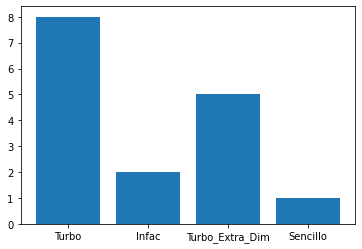

In [24]:
# Numero de rutas por tipo de camión

vehicles = list(set([ i['truck'] for i in sol ]))
count = { i:0 for i in vehicles }

for i in sol:
    count[i['truck']] += 1
plt.bar(vehicles, [ count[i] for i in vehicles])
for i in count:
    print(i, ": ", count[i])
print('Total: ', len(sol))

Turbo :  8
Infac :  2
Turbo_Extra_Dim :  5
Sencillo :  1
Total:  16


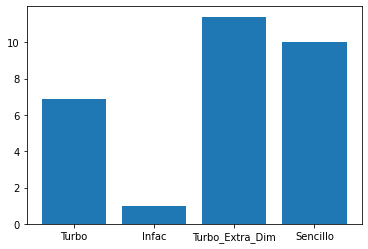

In [26]:
# Numero de paquetes en cada ruta
countP = { i:0 for i in vehicles }

for i in sol:
    countP[i['truck']] += len(i['packages'])
plt.bar(vehicles, [ countP[i]/count[i]  for i in vehicles])
for i in count:
    print(i, ": ", count[i])
print('Total: ', len(sol))

In [43]:
sumSol = [ {'Truck': i['truck'], 'Time': round(i['expectedTime']/60,2), 'Load': i['load'], 'Packages': len(i['packages'])} for i in sol]
df = pd.DataFrame.from_dict(sumSol)
display(df)

,Truck,Time,Load,Packages
0,Turbo,1.72,1767,2
1,Turbo_Extra_Dim,5.57,6832,6
2,Turbo,2.67,3112,8
3,Turbo,3.62,4860,1
4,Turbo,2.67,3815,5
5,Turbo_Extra_Dim,5.55,6403,18
6,Turbo,5.90,5027,13
7,Turbo,4.95,4976,7
8,Sencillo,5.87,9449,10
9,Turbo,4.15,2436,7


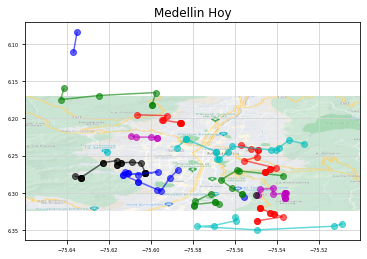

In [52]:
def plotSolution(solution:dict, packages: dict, title: str):
    import matplotlib.image as image
    from itertools import cycle
    im = image.imread('Medellin.png')
    
    fig, ax = plt.subplots()
    ax.imshow(im, aspect='auto', extent=(-75.6990, -75.50024, 6.3244, 6.17046))
    ax.yaxis.tick_left()
    ax.tick_params(axis='y', colors='black', labelsize=5)
    ax.tick_params(axis='x', colors='black', labelsize=5)
    ax.grid(b=True, which='major', color='#D3D3D3', linestyle='-')
    
    conteo = 0
    cycol = cycle('bgrcmk')
    
    for i in solution:
        
        x = [packages[j]['coordinates'][1] for j in i['packages']]
        y = [packages[j]['coordinates'][0] for j in i['packages']]
        
        
        plt.plot(x,y, c = next(cycol) , marker = "o", alpha = 0.6)
        
        conteo+=1
    
    plt.title(title)
    plt.show()

plotSolution(sol, realData['packages'], 'Medellin Hoy')